In [1]:
from env import get_db_url
import pandas as pd
import numpy as np
import seaborn as sns
import os
from wrangle import wrangle_zillow, split_data
import matplotlib.pyplot as plt

In [2]:
query = """
SELECT parcelid,bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017
JOIN propertylandusetype
USING (propertylandusetypeid)
WHERE propertylandusedesc = "Single Family Residential";
"""

In [3]:
# df = pd.read_sql(query, get_db_url('zillow'))

In [37]:
df = pd.read_csv('zillow_2017.csv')

In [38]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 8 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      2152863 non-null  int64  
 1   bedroomcnt                    2152852 non-null  float64
 2   bathroomcnt                   2152852 non-null  float64
 3   calculatedfinishedsquarefeet  2144379 non-null  float64
 4   taxvaluedollarcnt             2152370 non-null  float64
 5   yearbuilt                     2143526 non-null  float64
 6   taxamount                     2148421 non-null  float64
 7   fips                          2152863 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


In [39]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,10759547,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,11193347,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,11215747,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,11229347,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,11324547,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [40]:
# Rename columns
df=df.rename(columns = {'parcelid':'parcel_id', 'bedroomcnt':'bedroom_cnt', 'bathroomcnt':'bathroom_cnt', 'calculatedfinishedsquarefeet':'square_feet',
       'taxvaluedollarcnt':'tax_value', 'yearbuilt':'year_built', 'taxamount':'tax_amount'})

In [41]:
df.describe()

,parcel_id,bedroom_cnt,bathroom_cnt,square_feet,tax_value,year_built,tax_amount,fips
count,2.152863e+06,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,1.309657e+07,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,5.171557e+06,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,1.071172e+07,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,1.165907e+07,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,1.259852e+07,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,1.405609e+07,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,1.696019e+08,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [42]:
df.isna().sum()

parcel_id          0
bedroom_cnt       11
bathroom_cnt      11
square_feet     8484
tax_value        493
year_built      9337
tax_amount      4442
fips               0
dtype: int64

In [10]:
# Looks like a number of missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   parcel_id     int64  
 1   bedroom_cnt   float64
 2   bathroom_cnt  float64
 3   square_feet   float64
 4   tax_value     float64
 5   year_built    float64
 6   tax_amount    float64
 7   fips          float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


In [12]:
# year built should really be an int

In [13]:
df.shape[0]

2152863

In [14]:
# Lots of Nulls in yearbuilt and taxamount and square feet
df.shape[0] - df.dropna().shape[0]

12628

In [15]:
(df.shape[0] - df.dropna().shape[0])/df.shape[0]

0.005865677472277613

There are 12,628 rows that would be dropped if we drop all the nulls. This represents <0.6% of dataset

In [16]:
df = df.dropna()

In [17]:
#Convert datatypes
df.dtypes

parcel_id         int64
bedroom_cnt     float64
bathroom_cnt    float64
square_feet     float64
tax_value       float64
year_built      float64
tax_amount      float64
fips            float64
dtype: object

In [18]:
# Year and bedroom count should be integers. No such thing as half bedroom
df.year_built = df.year_built.astype('int64')
df.bedroom_cnt = df.bedroom_cnt.astype('int64')

In [19]:
df.dtypes

parcel_id         int64
bedroom_cnt       int64
bathroom_cnt    float64
square_feet     float64
tax_value       float64
year_built        int64
tax_amount      float64
fips            float64
dtype: object

In [20]:
df.describe()

,parcel_id,bedroom_cnt,bathroom_cnt,square_feet,tax_value,year_built,tax_amount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,1.304843e+07,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03,6.048310e+03
std,4.568911e+06,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,1.071172e+07,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,1.165653e+07,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03,6.037000e+03
50%,1.259605e+07,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03,6.037000e+03
75%,1.405310e+07,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03,6.059000e+03
max,1.681836e+08,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


## Visualize Distributions

In [21]:
df.columns

Index(['parcel_id', 'bedroom_cnt', 'bathroom_cnt', 'square_feet', 'tax_value',
       'year_built', 'tax_amount', 'fips'],
      dtype='object')

### Fips - only 3 values

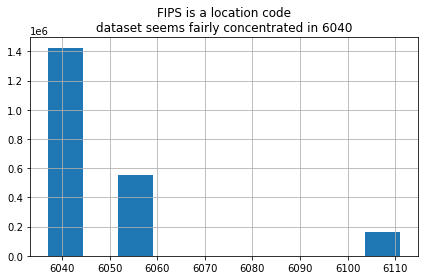

In [22]:
df.fips.hist()
plt.title("FIPS is a location code\ndataset seems fairly concentrated in 6040")
plt.tight_layout()

### Bath and bedroom count - some very high outliers

Text(0.5, 1.0, 'Some very high outliers')

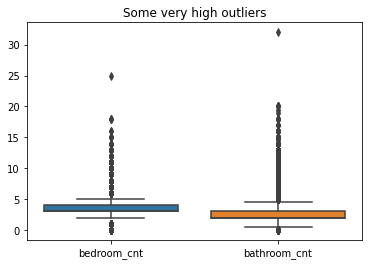

In [23]:
sns.boxplot(data = df[['bedroom_cnt','bathroom_cnt']])
plt.title('Some very high outliers')

Text(0.5, 1.0, 'Bedroom Count: Fairly normally distributed')

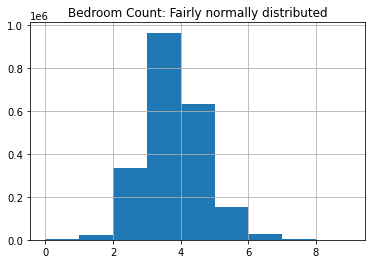

In [24]:
df.bedroom_cnt.hist(bins=range(10))
plt.title("Bedroom Count: Fairly normally distributed")

Text(0.5, 1.0, 'Bathroom count: Fairly normally distributed')

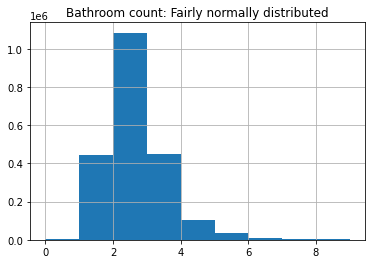

In [25]:
df.bathroom_cnt.hist(bins=range(10))
plt.title("Bathroom count: Fairly normally distributed")

### Tax Value - also very high outliers
 - Some very high tax amounts make it difficult to see the majority of values in the 0-10000 range
 - Also some very high tax values

Text(0.5, 1.0, 'Some very high outliers')

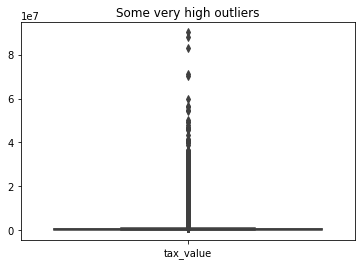

In [26]:
sns.boxplot(data=df[['tax_value']])
plt.title('Some very high outliers')

### Tax amount

Text(0.5, 1.0, 'Some very high outliers - may make sense to drop')

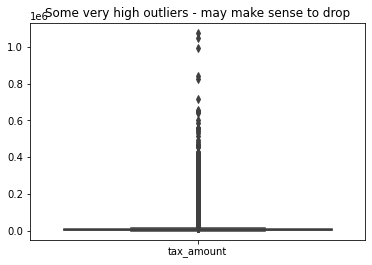

In [27]:
sns.boxplot(data=df[['tax_amount']])
plt.title('Some very high outliers - may make sense to drop')

In [28]:
(df.tax_amount>50000).sum()

7754

Text(0.5, 1.0, 'Tax amount capped at 50000')

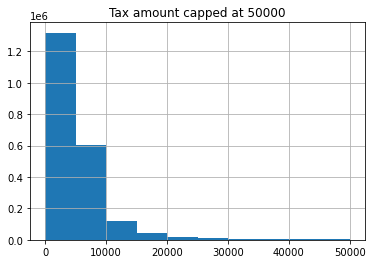

In [29]:
cap = 50_000
(df.tax_amount>cap).sum()

df[df.tax_amount<cap].tax_amount.hist()
plt.title(f"Tax amount capped at {cap}")

Text(0.5, 1.0, 'Tax values, capped at 1000000')

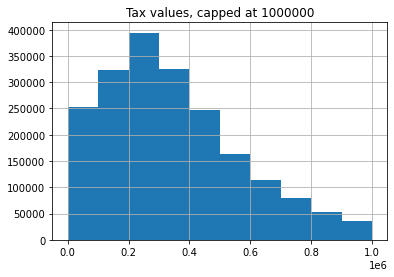

In [30]:
cap = 1_000_000
(df.tax_value>cap).sum()

df[df.tax_value<cap].tax_value.hist()
plt.title(f"Tax values, capped at {cap}")

### Square footage:
 - Some very high outliers above 30000 - mansions?

Text(0.5, 1.0, 'Some very high outliers-nearly a million square feet, make sense?')

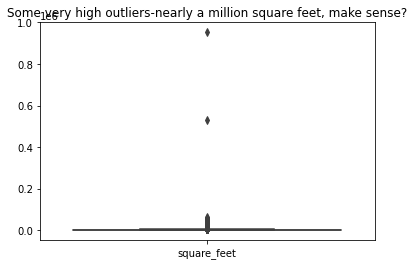

In [31]:
sns.boxplot(data=df[['square_feet']])
plt.title('Some very high outliers-nearly a million square feet, make sense?')

Text(0.5, 1.0, 'Square feet distribution for those under 5000 sq ft: Fairly normal ')

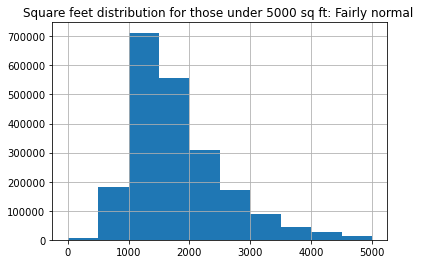

In [32]:
threshold = 5000
df[df.square_feet<threshold].square_feet.hist()
plt.title(f"Square feet distribution for those under {threshold} sq ft: Fairly normal ")

### Year built - some historical, some modern

Text(0.5, 1.0, 'Reasonable distribution')

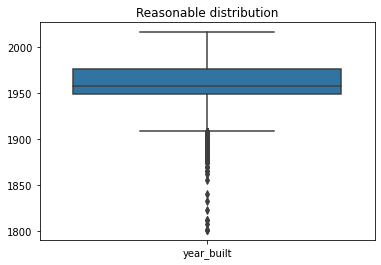

In [33]:
sns.boxplot(data=df[['year_built']])
plt.title('Reasonable distribution')

Text(0.5, 1.0, 'Year built: Fairly normal distribution')

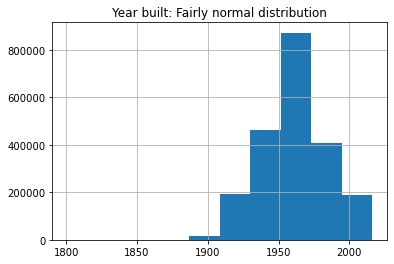

In [34]:
df.year_built.hist()
plt.title("Year built: Fairly normal distribution")

In [35]:
train, validate, test =split_data(df)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%
